<a href="https://colab.research.google.com/github/attane007/Trading_strategy/blob/main/Gold_indicator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EMA in weekly chart

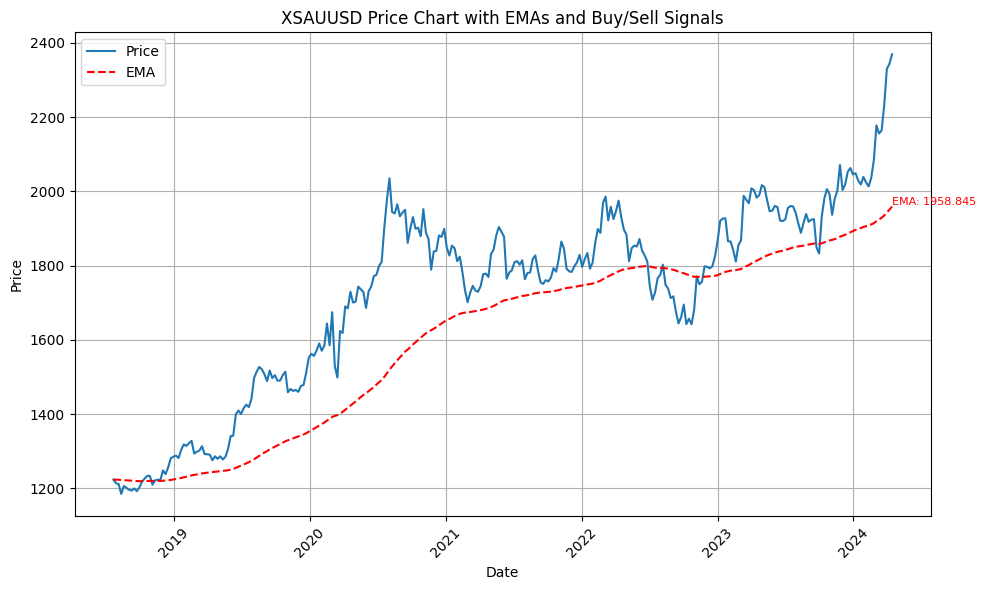

Buy Signal: 2018-10-14 00:00:00 - Price: 1226.32 - Asset: 0.82 stocks
Sell Signal: 2018-11-04 00:00:00 - Price: 1209.6 - Asset: $986.37
Buy Signal: 2018-11-11 00:00:00 - Price: 1221.47 - Asset: 0.81 stocks
Sell Signal: 2022-07-03 00:00:00 - Price: 1742.82 - Asset: $1407.37
Buy Signal: 2022-08-07 00:00:00 - Price: 1802.34 - Asset: 0.78 stocks
Sell Signal: 2022-08-14 00:00:00 - Price: 1748.11 - Asset: $1365.02
Buy Signal: 2022-11-06 00:00:00 - Price: 1770.69 - Asset: 0.77 stocks
Sell Signal: 2022-11-13 00:00:00 - Price: 1749.74 - Asset: $1348.87
Buy Signal: 2022-11-27 00:00:00 - Price: 1797.82 - Asset: 0.75 stocks
Sell Signal: 2023-09-24 00:00:00 - Price: 1848.31 - Asset: $1386.75
Buy Signal: 2023-10-08 00:00:00 - Price: 1931.7 - Asset: 0.72 stocks
Initial USD: $1000
Final USD: $1700.68


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("XAU_USD Historical Data 1W.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Remove commas from Price column and convert it to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Select only the last 100 rows
df = df.tail(300)


mean = df['Price'].ewm(span=100, adjust=False).mean().round(3)

# Plot the price chart and EMAs
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Price', linestyle='-')
plt.plot(df['Date'], mean, label='EMA', linestyle='--', color='red')

# Annotate with the latest EMA values
plt.text(df['Date'].iloc[-1], mean.iloc[-1], f'EMA: {mean.iloc[-1]}', fontsize=8, verticalalignment='bottom', horizontalalignment='left', color='red')

plt.title('XSAUUSD Price Chart with EMAs and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Initialize variables
initial_usd = 1000
usd_balance = initial_usd
stock_balance = 0

# Flag to indicate if we are holding stocks
holding_stock = False

# Simulate buy and sell signals
for i in range(1, len(df)):
    if df['Price'].iloc[i] > mean.iloc[i] and not holding_stock:
        # Buy signal
        stock_balance = usd_balance / df['Price'].iloc[i]
        usd_balance = 0
        holding_stock = True
        print(f"Buy Signal: {df['Date'].iloc[i]} - Price: {df['Price'].iloc[i]} - Asset: {stock_balance:.2f} stocks")
    elif df['Price'].iloc[i] < mean.iloc[i] and holding_stock:
        # Sell signal
        usd_balance = stock_balance * df['Price'].iloc[i]
        stock_balance = 0
        holding_stock = False
        print(f"Sell Signal: {df['Date'].iloc[i]} - Price: {df['Price'].iloc[i]} - Asset: ${usd_balance:.2f}")

# Calculate final USD balance if still holding stocks
if stock_balance > 0:
    usd_balance = stock_balance * df['Price'].iloc[-1]

print(f"Initial USD: ${initial_usd}")
print(f"Final USD: ${usd_balance:.2f}")


EMA cross over

Buy Signal: 2012-11-08 00:00:00 - Price: 1730.99 - Asset: 0.58 stocks
Sell Signal: 2012-12-04 00:00:00 - Price: 1697.35 - Asset: $980.57
Buy Signal: 2013-08-26 00:00:00 - Price: 1404.9 - Asset: 0.70 stocks
Sell Signal: 2013-09-05 00:00:00 - Price: 1367.85 - Asset: $954.71
Buy Signal: 2014-02-11 00:00:00 - Price: 1291.85 - Asset: 0.74 stocks
Sell Signal: 2014-03-27 00:00:00 - Price: 1291.14 - Asset: $954.18
Buy Signal: 2014-04-08 00:00:00 - Price: 1308.72 - Asset: 0.73 stocks
Sell Signal: 2014-04-17 00:00:00 - Price: 1294.85 - Asset: $944.07
Buy Signal: 2014-05-05 00:00:00 - Price: 1309.85 - Asset: 0.72 stocks
Sell Signal: 2014-05-07 00:00:00 - Price: 1289.55 - Asset: $929.44
Buy Signal: 2014-05-14 00:00:00 - Price: 1305.6 - Asset: 0.71 stocks
Sell Signal: 2014-05-15 00:00:00 - Price: 1296.35 - Asset: $922.85
Buy Signal: 2014-06-19 00:00:00 - Price: 1320.1 - Asset: 0.70 stocks
Sell Signal: 2014-07-30 00:00:00 - Price: 1295.05 - Asset: $905.34
Buy Signal: 2014-08-07 00:00:00 - Price: 131

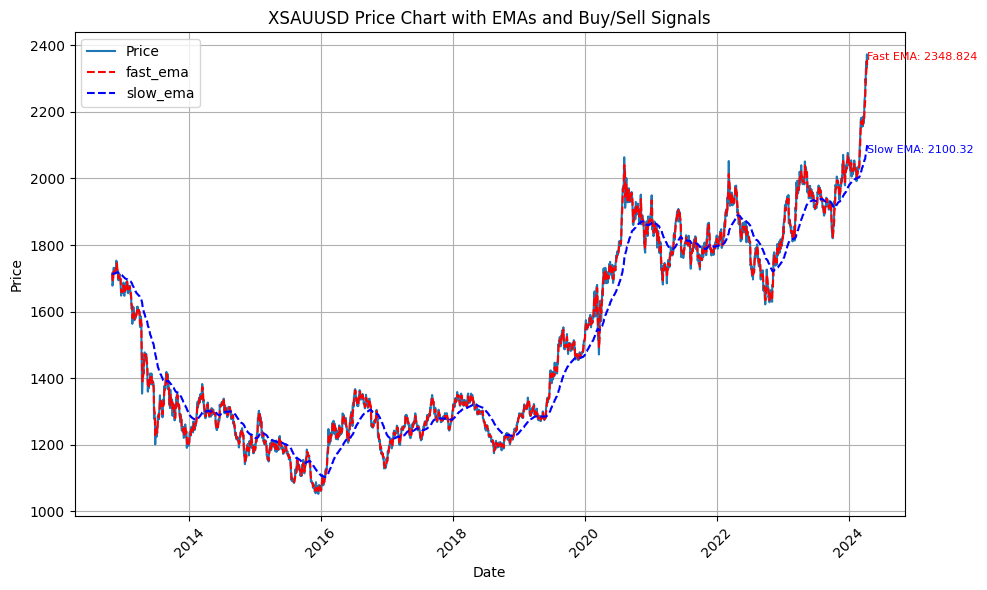

Initial USD: $1000
Final USD: $1428.53


In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("XAU_USD Historical Data.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Remove commas from Price column and convert it to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Select only the last 100 rows
df = df.tail(4000)

# Calculate EMAs for the last 100 rows
fast_ema = df['Price'].ewm(span=3, adjust=False).mean().round(3)
slow_ema = df['Price'].ewm(span=107, adjust=False).mean().round(3)

# Initialize variables
initial_usd = 1000
usd_balance = initial_usd
stock_balance = 0
buy_price = 0

# Simulate buy and sell signals
for i in range(1, len(df)):
    if fast_ema.iloc[i] > slow_ema.iloc[i] and fast_ema.iloc[i-1] <= slow_ema.iloc[i-1]:
        # Buy signal
        if usd_balance > 0:
            stock_balance = usd_balance / df['Price'].iloc[i]
            usd_balance = 0
            buy_price = df['Price'].iloc[i]
            print(f"Buy Signal: {df['Date'].iloc[i]} - Price: {buy_price} - Asset: {stock_balance:.2f} stocks")
    elif fast_ema.iloc[i] < slow_ema.iloc[i] and fast_ema.iloc[i-1] >= slow_ema.iloc[i-1]:
        # Sell signal
        if stock_balance > 0:
            usd_balance = stock_balance * df['Price'].iloc[i]
            stock_balance = 0
            print(f"Sell Signal: {df['Date'].iloc[i]} - Price: {df['Price'].iloc[i]} - Asset: ${usd_balance:.2f}")

# Calculate final USD balance if still holding stocks
if stock_balance > 0:
    usd_balance = stock_balance * df['Price'].iloc[-1]

# Plot the price chart and EMAs
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Price'], label='Price', linestyle='-')
plt.plot(df['Date'], fast_ema, label='fast_ema', linestyle='--', color='red')
plt.plot(df['Date'], slow_ema, label='slow_ema', linestyle='--', color='blue')

# Annotate with the latest EMA values
plt.text(df['Date'].iloc[-1], fast_ema.iloc[-1], f'Fast EMA: {fast_ema.iloc[-1]}', fontsize=8, verticalalignment='bottom', horizontalalignment='left', color='red')
plt.text(df['Date'].iloc[-1], slow_ema.iloc[-1], f'Slow EMA: {slow_ema.iloc[-1]}', fontsize=8, verticalalignment='top', horizontalalignment='left', color='blue')

plt.title('XSAUUSD Price Chart with EMAs and Buy/Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Initial USD: ${initial_usd}")
print(f"Final USD: ${usd_balance:.2f}")


Find best match EMA

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("XAU_USD Historical Data.csv")

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort DataFrame by date
df = df.sort_values(by='Date')

# Remove commas from Price column and convert it to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Select only the last 100 rows
df = df.tail(300)

results = []

def simulate_trade(ema1=10, ema2=18):
  # Calculate EMAs for the last 100 rows
  fast_ema = df['Price'].ewm(span=ema1, adjust=False).mean().round(3)
  slow_ema = df['Price'].ewm(span=ema2, adjust=False).mean().round(3)

  # Initialize variables
  initial_usd = 1000
  usd_balance = initial_usd
  stock_balance = 0
  buy_price = 0

  # Simulate buy and sell signals
  for i in range(1, len(df)):
      if fast_ema.iloc[i] > slow_ema.iloc[i] and fast_ema.iloc[i-1] <= slow_ema.iloc[i-1]:
          # Buy signal
          if usd_balance > 0:
              stock_balance = usd_balance / df['Price'].iloc[i]
              usd_balance = 0
              buy_price = df['Price'].iloc[i]
              # print(f"Buy Signal: {df['Date'].iloc[i]} - Price: {buy_price} - Asset: {stock_balance:.2f} stocks")
      elif fast_ema.iloc[i] < slow_ema.iloc[i] and fast_ema.iloc[i-1] >= slow_ema.iloc[i-1]:
          # Sell signal
          if stock_balance > 0:
              usd_balance = stock_balance * df['Price'].iloc[i]
              stock_balance = 0
              # print(f"Sell Signal: {df['Date'].iloc[i]} - Price: {df['Price'].iloc[i]} - Asset: ${usd_balance:.2f}")

  # Calculate final USD balance if still holding stocks
  if stock_balance > 0:
      usd_balance = stock_balance * df['Price'].iloc[-1]

  results.append((ema1, ema2, usd_balance))

  # print(f"Fast_EMA={ema1} Slow_EMA={ema2} Initial USD: ${initial_usd} Final USD: ${usd_balance:.2f}")

for i in range(3, 50):
    for j in range(90,200):
      simulate_trade(i,j)

# Sort results by final USD balance in descending order
results.sort(key=lambda x: x[2], reverse=True)

# Show top 10 combinations
print("\n\nTop 10 combinations of EMAs with the highest profit:")
for idx, result in enumerate(results[:10], 1):
    print(f"{idx}. Fast_EMA={result[0]}, Slow_EMA={result[1]}, Final USD: ${result[2]:.2f}")



Top 10 combinations of EMAs with the highest profit:
1. Fast_EMA=3, Slow_EMA=107, Final USD: $1203.06
2. Fast_EMA=3, Slow_EMA=108, Final USD: $1203.06
3. Fast_EMA=3, Slow_EMA=102, Final USD: $1196.04
4. Fast_EMA=3, Slow_EMA=103, Final USD: $1196.04
5. Fast_EMA=3, Slow_EMA=104, Final USD: $1196.04
6. Fast_EMA=3, Slow_EMA=105, Final USD: $1196.04
7. Fast_EMA=3, Slow_EMA=106, Final USD: $1196.04
8. Fast_EMA=6, Slow_EMA=90, Final USD: $1194.51
9. Fast_EMA=6, Slow_EMA=91, Final USD: $1194.51
10. Fast_EMA=6, Slow_EMA=92, Final USD: $1194.51
